In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import cv2
import matplotlib.pyplot as plt
bbox=(51.38097,51.36682,7.70601,7.68292)
gdf = ox.geometries_from_xml(filepath="./finalMap.osm")
#G = ox.graph_from_xml(filepath="./finalMap.osm")

streettypes = [#'traffic_signals', 
#'crossing', 
#'bus_stop',
# 'turning_circle', 
# 'street_lamp', 
 #'elevator', 
 'secondary', 
 'residential', 
 #'footway', 
 #'pedestrian',
 #'track', 
 'living_street', 
 'service', 
 #'steps', 
 #'cycleway', 
 'tertiary',
 'secondary_link', 
 'unclassified', 
 #'path', 
 #'platform'
 ]

street_width = {#'traffic_signals', 
#'crossing', 
#'bus_stop',
 'turning_circle' : 1, 
# 'street_lamp', 
 #'elevator', 
 'secondary' : 5, 
 'residential' : 2, 
 #'footway', 
 #'pedestrian',
 #'track', 
 'living_street' : 1, 
 'service' : 1, 
 #'steps', 
 #'cycleway', 
 'tertiary' : 3,
 'secondary_link' : 1, 
 'unclassified' : 3, 
 #'path', 
 #'platform'
 }

street_colors = {#'traffic_signals', 
#'crossing', 
#'bus_stop',
 'turning_circle' : "red", 
# 'street_lamp', 
 #'elevator', 
 'secondary' : "blue", 
 'residential' : "red", 
 #'footway', 
 #'pedestrian',
 #'track', 
 'living_street' :  "red", 
 'service' :  "yellow", 
 #'steps', 
 #'cycleway', 
 'tertiary' :  "green",
 'secondary_link' :  "blue", 
 'unclassified' : "green", 
 #'path', 
 #'platform'
 }


In [2]:
newgdf = gdf[gdf["highway"].isin(streettypes)]

In [3]:
def calc_node_id(row):
    return row.name[1]

In [4]:
def calc_new_width(row):
   return street_width[row["highway"]]
   

def calc_new_color(row):
    return street_colors[row["highway"]]

In [5]:
def calc_new_width2(row):
   return street_width[row["highway"]]*2
   

def calc_new_color2(row):
    return "red"

In [6]:
nodeIds = [
5071232969
,1976845083
,6942461856
,1741362949
,599402192
,5069564551
,520269533
,520269532
,520269531
,520269530
,520269529
,520269528
,406672100
,146610774
,39253953
,146610775
,553981882
,553981879
,24821471
,552233294
,552233293
,552233289
,552233284
,405738880
,750487113
,751581926
,725921847
,146771260
,146770682
,532002862
,46974872
,737227190
,737227189
,533879749
,46974873
]

In [7]:
newgdf["node_id"] = newgdf.apply(calc_node_id, axis=1)

newgdfbus = newgdf[newgdf["node_id"].isin(nodeIds)]

c:\Users\pober\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [9]:
f = open("coords.txt", "w")
for i in newgdfbus["geometry"]:
    x,y = i.coords.xy
    for j in list(zip(x,y)):
        f.write(str(j[0]) + ";" + str(j[1]) + "\n")
f.close()

c:\Users\pober\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\pober\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\pober\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVer

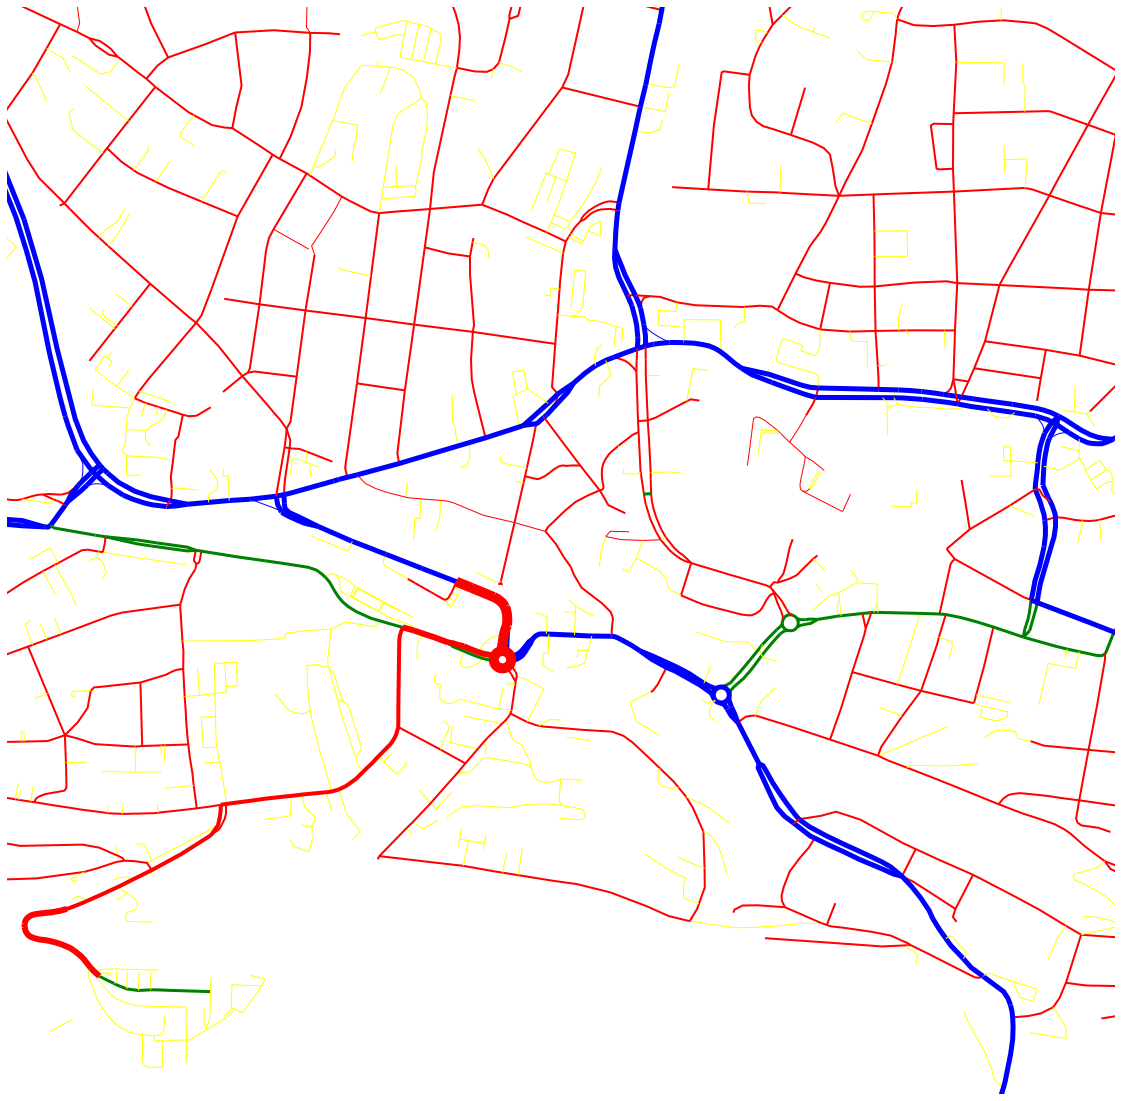

In [20]:

newgdf["street_width"] = newgdf.apply(calc_new_width, axis=1)
newgdf["street_color"] = newgdf.apply(calc_new_color, axis=1)



newgdfbus["street_width"] = newgdfbus.apply(calc_new_width2, axis=1)
newgdfbus["street_color"] = newgdfbus.apply(calc_new_color2, axis=1)

ax = newgdf.plot(color=newgdf["street_color"], linewidth= newgdf["street_width"])
newgdfbus.plot(ax=ax, color=newgdfbus["street_color"], linewidth= newgdfbus["street_width"])
fig = ax.get_figure()
fig.set_size_inches(20,20)
ax.set_xlim([7.68292, 7.70601])
ax.set_ylim([51.36682, 51.38097])
plt.axis('off')
plt.savefig('image.png', dpi=100, bbox_inches='tight',pad_inches = 0)
plt.show()

<Figure size 432x288 with 0 Axes>

In [23]:
img = cv2.cvtColor(np.asarray(fig.canvas.buffer_rgba()), cv2.COLOR_RGBA2BGR)
cv2.imshow("window", img)
cv2.waitKey(0)

114